# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

url = 'https://www.mlb.com/stats/san-francisco-giants/all-time-by-season'

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
response




<Response [200]>

In [2]:
tables = soup.find_all('table')
table = tables[0]

headers = [th.text.strip() for th in table.find_all('th')]

rows = []
for tr in table.find_all('tr')[1:]:  
    cells = [td.text.strip() for td in tr.find_all('td')]
    rows.append(cells)

df = pd.DataFrame(rows)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2004,SF,147,373,129,135,27,3,45,101,232,41,6,1,.362,.609,.812,1.421
1,2002,SF,143,403,117,149,31,2,46,110,198,47,9,2,.370,.582,.799,1.381
2,2001,SF,153,476,129,156,32,2,73,137,177,93,13,3,.328,.515,.863,1.378
3,2003,SF,130,390,111,133,22,1,45,90,148,58,7,0,.341,.529,.749,1.278
4,1993,SF,159,539,129,181,38,4,46,123,126,79,29,12,.336,.458,.677,1.135
5,2000,SF,143,480,129,147,28,4,49,106,117,77,11,3,.306,.440,.688,1.128
6,1969,SF,149,491,101,157,26,2,45,126,121,66,0,0,.320,.453,.656,1.109
7,1929,NYG,150,545,138,179,37,2,42,151,113,38,6,--,.328,.449,.635,1.084
8,1954,NYG,151,565,119,195,33,13,41,110,66,57,8,5,.345,.411,.667,1.078
9,1996,SF,158,517,122,159,27,3,42,129,151,76,40,7,.308,.461,.615,1.076


In [10]:
import pandas as pd
import re 

def clean_value(value):
    if value:
        
        value = re.sub(r'[\$,]', '', value)
        return value.strip() if value else None
    return None

df_cleaned = df.applymap(clean_value)

df_cleaned.dropna(how='all', inplace=True)

print(df_cleaned)

      0    1    2    3    4    5   6   7   8    9    10   11  12  13    14  \
0   2004   SF  147  373  129  135  27   3  45  101  232   41   6   1  .362   
1   2002   SF  143  403  117  149  31   2  46  110  198   47   9   2  .370   
2   2001   SF  153  476  129  156  32   2  73  137  177   93  13   3  .328   
3   2003   SF  130  390  111  133  22   1  45   90  148   58   7   0  .341   
4   1993   SF  159  539  129  181  38   4  46  123  126   79  29  12  .336   
5   2000   SF  143  480  129  147  28   4  49  106  117   77  11   3  .306   
6   1969   SF  149  491  101  157  26   2  45  126  121   66   0   0  .320   
7   1929  NYG  150  545  138  179  37   2  42  151  113   38   6  --  .328   
8   1954  NYG  151  565  119  195  33  13  41  110   66   57   8   5  .345   
9   1996   SF  158  517  122  159  27   3  42  129  151   76  40   7  .308   
10  1994   SF  112  391   89  122  18   1  37   81   74   43  29   9  .312   
11  1930  NYG  154  633  139  254  39  15  23  129   57   33   8

/tmp/ipykernel_639/944964522.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(clean_value)


In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('clean_data.db')
cursor = conn.cursor()

columns = ', '.join([f'"{col}" TEXT' for col in df_cleaned.columns])

cursor.execute(f'CREATE TABLE IF NOT EXISTS mlb_stats ({columns})')
placeholders = ', '.join(['?'] * len(df_cleaned.columns))
insert_query = f'INSERT INTO mlb_stats VALUES ({placeholders})'

for row in df_cleaned.itertuples(index=False, name=None):
    cursor.execute(insert_query, row)

conn.commit()
conn.close()

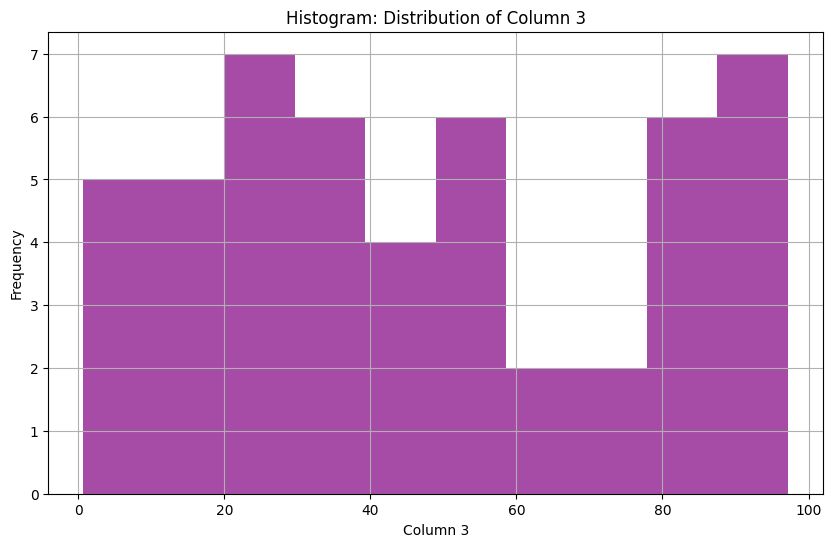

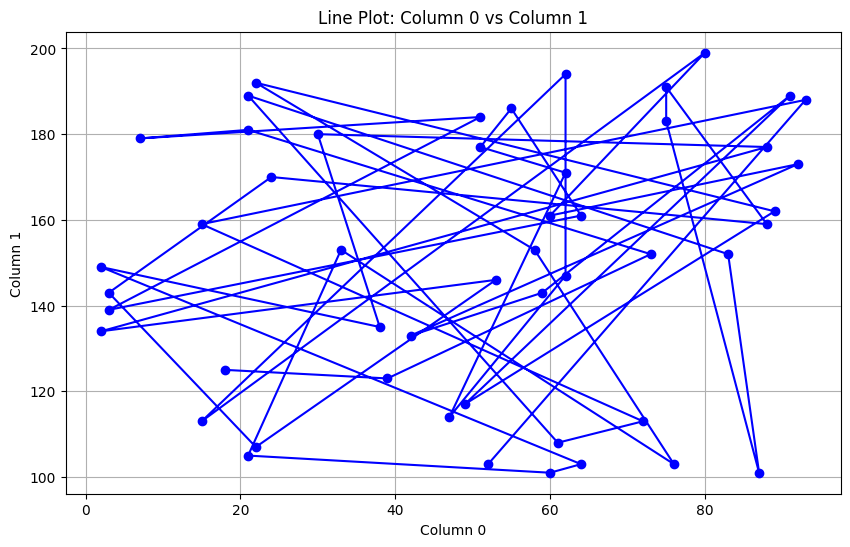

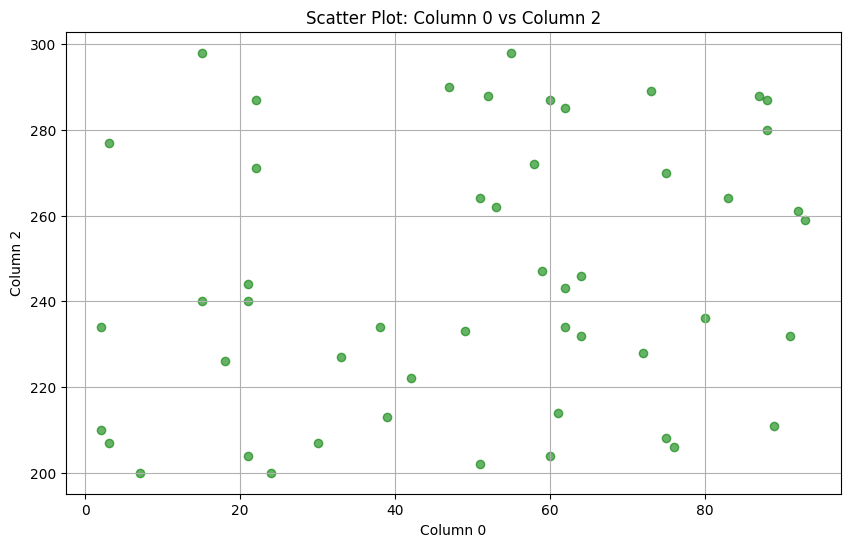

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)
df_cleaned = pd.DataFrame({
    0: np.random.randint(1, 100, 50),  
    1: np.random.randint(100, 200, 50),
    2: np.random.randint(200, 300, 50), 
    3: np.random.rand(50) * 100        
})

plt.figure(figsize=(10, 6))
plt.hist(df_cleaned[3], bins=10, color='purple', alpha=0.7)
plt.title('Histogram: Distribution of Column 3')
plt.xlabel('Column 3')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned[0], df_cleaned[1], marker='o', linestyle='-', color='blue')
plt.title('Line Plot: Column 0 vs Column 1')
plt.xlabel('Column 0')
plt.ylabel('Column 1')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[0], df_cleaned[2], color='green', alpha=0.6)
plt.title('Scatter Plot: Column 0 vs Column 2')
plt.xlabel('Column 0')
plt.ylabel('Column 2')
plt.grid(True)
plt.show()
